In [46]:
import pickle

with open('dataset.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [47]:
mapping = {0: [1,0,0,0], 1: [0,1,0,0], 2: [0,0,1,0], 3:[0,0,0,1]}

def enc_seq(seq_list):
    seq_enc = []

    for seq in seq_list:
        if len(seq) < 18 :
            seq += [4]*(18-len(seq))
        mapped_seq = list(map(lambda x: mapping[x] if x in mapping else [0.25,0.25,0.25,0.25], seq))
        seq_enc.append(mapped_seq)
    return seq_enc

In [48]:
X_train_enc = enc_seq(X_train)
X_test_enc = enc_seq(X_test)

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
from matplotlib import pyplot as plt 

tf.random.set_seed(42)

model = models.Sequential()

model.add(layers.Conv1D(1, 8, strides=2,activation='relu', input_shape=(None, 4)))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [100]:
total_epoch = 70
batch_size = 7
history = model.fit(X_train_enc, y_train, epochs=total_epoch, batch_size=batch_size, verbose=1,
                    validation_data=(X_test_enc, y_test))

Epoch 1/70
4/4 [==============================] - 1s 104ms/step - loss: 0.7459 - auc: 0.4235 - val_loss: 0.7555 - val_auc: 0.3611
Epoch 2/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7376 - auc: 0.4362 - val_loss: 0.7500 - val_auc: 0.3611
Epoch 3/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7308 - auc: 0.4439 - val_loss: 0.7449 - val_auc: 0.3611
Epoch 4/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7248 - auc: 0.4439 - val_loss: 0.7404 - val_auc: 0.3611
Epoch 5/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7194 - auc: 0.4541 - val_loss: 0.7363 - val_auc: 0.3611
Epoch 6/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7145 - auc: 0.4566 - val_loss: 0.7326 - val_auc: 0.3750
Epoch 7/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7102 - auc: 0.4847 - val_loss: 0.7295 - val_auc: 0.3750
Epoch 8/70
4/4 [==============================] - 0s 14ms/step - loss: 0.7063 - auc: 0.4872 - va

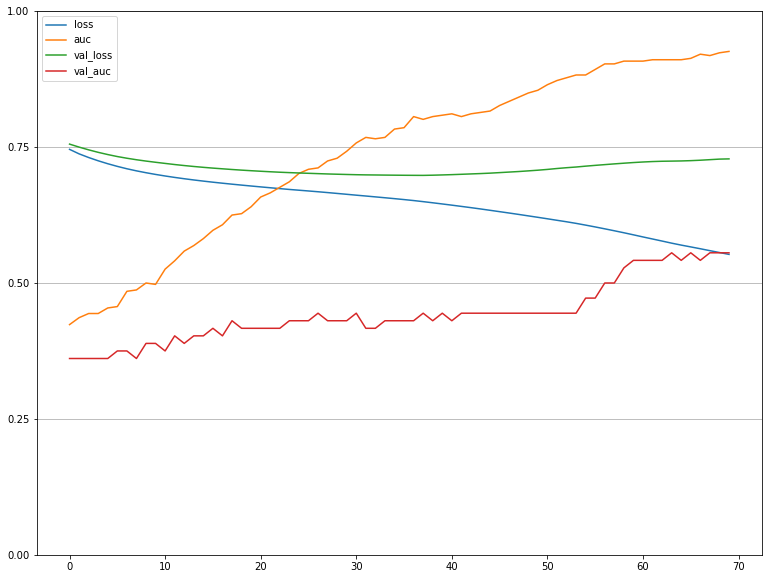

In [101]:
pd.DataFrame(history.history).plot(figsize=(13, 10))
plt.grid(axis='y')
plt.ylim(0, 1)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test_enc)
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
test_score = roc_auc_score(y_test, y_pred)

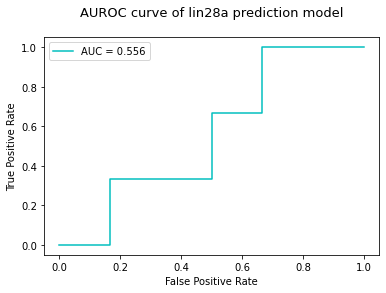

In [103]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(test_score),c='c') #marker='.'
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'AUROC curve of lin28a prediction model\n', size=13)
plt.legend()
plt.show()

In [104]:
with open('CNN_results.pkl', 'wb') as f :
    pickle.dump((fpr,tpr,test_score), f)